In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import  statsmodels.api as sm

from imblearn.over_sampling import SMOTE ## Synthetic minority oversampling technique

In [3]:
data =pd.read_csv("heart_attack_russia_youth_vs_adult.csv")

In [4]:
data.shape

(50000, 30)

In [5]:
# Decreasing sample size because SVC was taking a lot of time this just to perform this practical in real world you have to take the whole dataset i.e. all rows
data = data.sample(10000) 

In [6]:
data["Heart_Attack"].value_counts(normalize=True)*100

Heart_Attack
False    88.499299
True     11.500701
Name: proportion, dtype: float64

### **Heart_Attack is my target variable.**

In [7]:
data.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
30542,30543.0,54,Male,Urban,115.0,256.6,25.9,78.0,High,True,NaN,False,True,8.0,False,False,True,Healthy,6.3,Unemployed,High,Moderate,Primary,Single,Urban,False,3.0,3.0,3.0,False
10472,10473.0,50,Female,Rural,114.7,143.6,25.4,69.0,Moderate,False,NaN,False,True,10.0,False,False,False,Unhealthy,7.2,Employed,High,Moderate,Higher,Married,Rural,False,5.0,3.0,10.0,False
34866,34867.0,21,Female,Rural,117.1,238.3,37.5,85.0,Moderate,True,Heavy,False,True,1.0,False,False,True,Healthy,8.7,Employed,High,Moderate,Higher,Single,Urban,False,3.0,1.9,1.0,True
48109,48110.0,42,Female,Rural,139.1,203.9,26.6,84.0,Low,False,NaN,False,False,3.0,False,False,False,Unhealthy,9.7,Employed,Low,Moderate,Primary,Married,Urban,False,1.0,4.8,10.0,True
18915,18916.0,52,Male,Urban,96.7,232.7,25.3,79.0,Low,True,NaN,False,True,3.0,False,False,False,Healthy,8.8,Student,High,Moderate,Primary,Married,Urban,False,4.0,3.2,5.0,False


In [8]:
data.info() #no inconsistent data type 

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 30542 to 39160
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9995 non-null   float64
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Region                 9996 non-null   object 
 4   Blood_Pressure         9992 non-null   float64
 5   Cholesterol            10000 non-null  float64
 6   BMI                    10000 non-null  float64
 7   Heart_Rate             9983 non-null   float64
 8   Exercise_Level         9968 non-null   object 
 9   Smoking                9982 non-null   object 
 10  Alcohol_Consumption    5084 non-null   object 
 11  Diabetes               9982 non-null   object 
 12  Family_History         9982 non-null   object 
 13  Stress_Level           9979 non-null   float64
 14  Heart_Attack           9982 non-null   object 
 15  Ang

### **Checking redundant columns i.e. ID**

In [9]:
data.drop("ID",axis=1,inplace=True)

In [10]:
data.shape

(10000, 29)

In [11]:
data.head(1)

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
30542,54,Male,Urban,115.0,256.6,25.9,78.0,High,True,NaN,False,True,8.0,False,False,True,Healthy,6.3,Unemployed,High,Moderate,Primary,Single,Urban,False,3.0,3.0,3.0,False


### **Checking duplicate rows**

In [12]:
data.duplicated()

30542    False
10472    False
34866    False
48109    False
18915    False
         ...  
47351    False
37358    False
21440    False
47599    False
39160    False
Length: 10000, dtype: bool

In [13]:
data[data.duplicated()]

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity


### **Checking null values**

In [14]:
data.shape

(10000, 29)

In [15]:
data.isnull().sum()/data.shape[0]*100

Age                       0.00
Gender                    0.00
Region                    0.04
Blood_Pressure            0.08
Cholesterol               0.00
BMI                       0.00
Heart_Rate                0.17
Exercise_Level            0.32
Smoking                   0.18
Alcohol_Consumption      49.16
Diabetes                  0.18
Family_History            0.18
Stress_Level              0.21
Heart_Attack              0.18
Angina                    0.27
Heart_Disease_History     0.13
Diet                      0.13
Sleep_Hours               0.13
Occupation                0.26
Income_Level              0.13
Physical_Activity         0.13
Education_Level           0.13
Marital_Status            0.18
Urban_Rural               0.17
Medication                0.12
Health_Awareness          0.12
Daily_Water_Intake        0.12
Mental_Health             0.12
Obesity                   0.00
dtype: float64

In [16]:
data.Heart_Attack.unique()

array([False, True, nan], dtype=object)

In [17]:
d = data[data["Heart_Attack"].isnull()==True].index

In [18]:
d

Index([267, 103, 65, 114, 74, 85, 130, 116, 119, 72, 70, 59, 55, 71, 62, 52,
       54, 127],
      dtype='int64')

In [19]:
data.drop(d,inplace=True)

### **Filling null values**

In [20]:
data.isnull().sum()/data.shape[0]*100

Age                       0.000000
Gender                    0.000000
Region                    0.040072
Blood_Pressure            0.000000
Cholesterol               0.000000
BMI                       0.000000
Heart_Rate                0.000000
Exercise_Level            0.140252
Smoking                   0.000000
Alcohol_Consumption      49.068323
Diabetes                  0.000000
Family_History            0.000000
Stress_Level              0.030054
Heart_Attack              0.000000
Angina                    0.090162
Heart_Disease_History     0.000000
Diet                      0.000000
Sleep_Hours               0.000000
Occupation                0.130234
Income_Level              0.000000
Physical_Activity         0.000000
Education_Level           0.000000
Marital_Status            0.050090
Urban_Rural               0.050090
Medication                0.000000
Health_Awareness          0.000000
Daily_Water_Intake        0.000000
Mental_Health             0.000000
Obesity             

In [21]:
for i in data.select_dtypes(include="object"):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [22]:
data.Alcohol_Consumption.mode()[0]

'Moderate'

In [23]:
for i in data.select_dtypes(exclude="object"):
    data[i].fillna(data[i].mean(),inplace=True)

In [24]:
data.isnull().sum()/data.shape[0]*100

Age                      0.0
Gender                   0.0
Region                   0.0
Blood_Pressure           0.0
Cholesterol              0.0
BMI                      0.0
Heart_Rate               0.0
Exercise_Level           0.0
Smoking                  0.0
Alcohol_Consumption      0.0
Diabetes                 0.0
Family_History           0.0
Stress_Level             0.0
Heart_Attack             0.0
Angina                   0.0
Heart_Disease_History    0.0
Diet                     0.0
Sleep_Hours              0.0
Occupation               0.0
Income_Level             0.0
Physical_Activity        0.0
Education_Level          0.0
Marital_Status           0.0
Urban_Rural              0.0
Medication               0.0
Health_Awareness         0.0
Daily_Water_Intake       0.0
Mental_Health            0.0
Obesity                  0.0
dtype: float64

In [25]:
data.Heart_Attack = data["Heart_Attack"].astype(np.number)

C:\Users\MOHIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [26]:
x=data.drop("Heart_Attack",axis=1)
y = data.Heart_Attack

In [27]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=13)

### **Outlier treatment**

In [28]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr=q3-q1
    u=q3+1.5*iqr
    l=q1-1.5*iqr
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

<Axes: xlabel='Heart_Attack'>

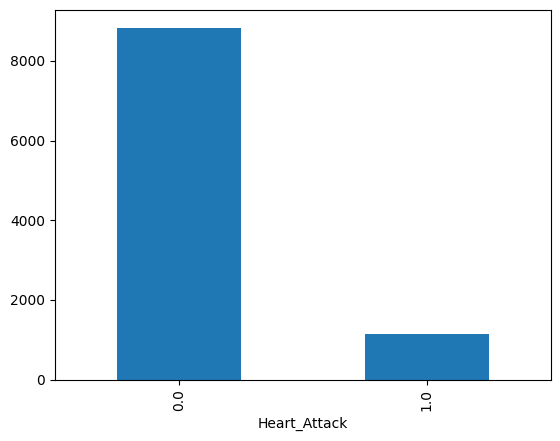

In [29]:
data["Heart_Attack"].value_counts().plot(kind="bar")

Age


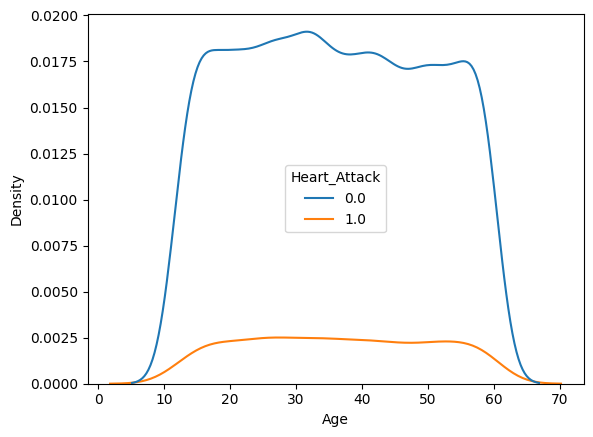

Blood_Pressure


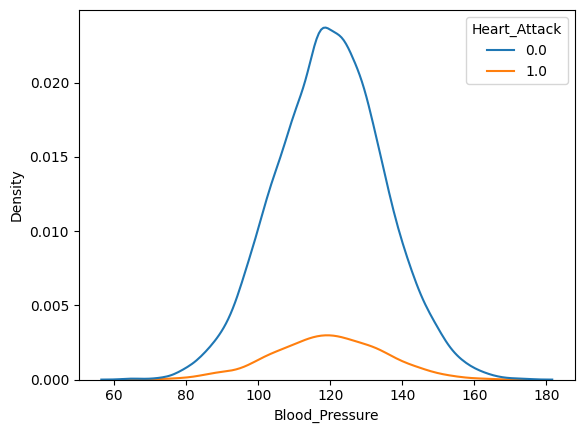

Cholesterol


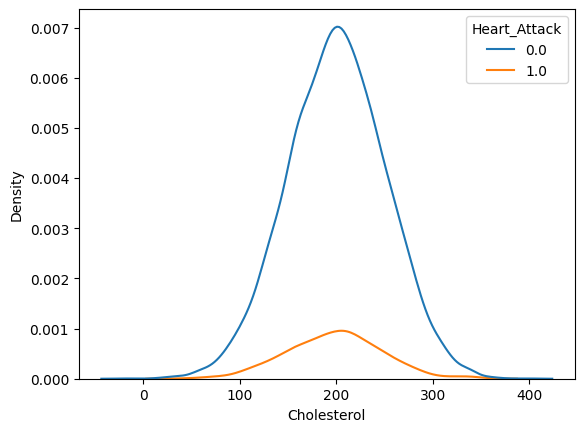

BMI


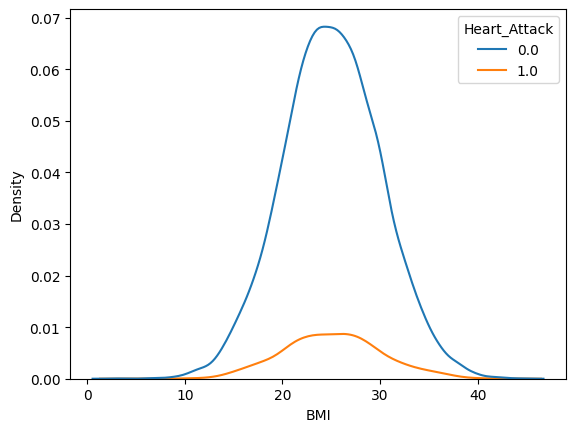

Heart_Rate


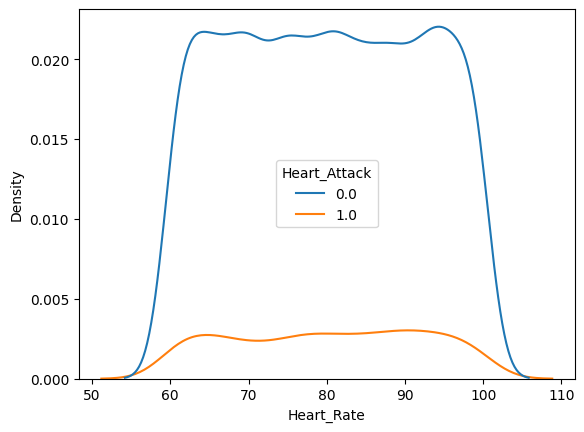

Stress_Level


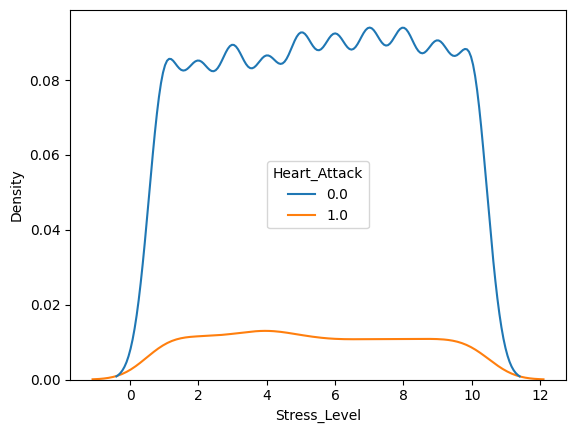

Heart_Attack


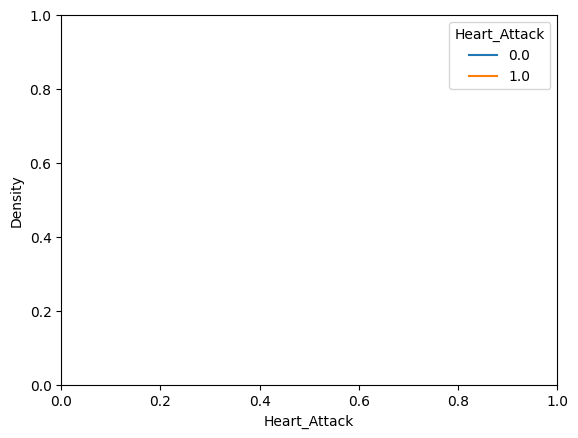

Angina


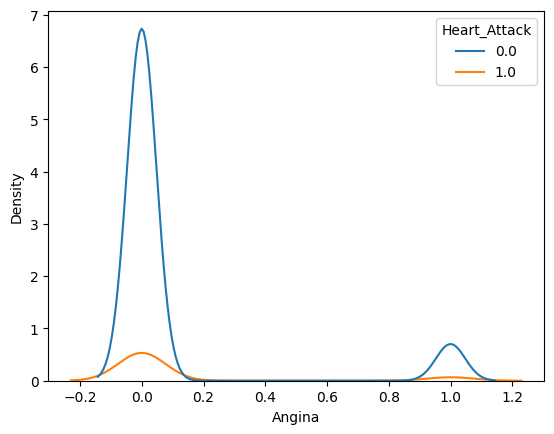

Sleep_Hours


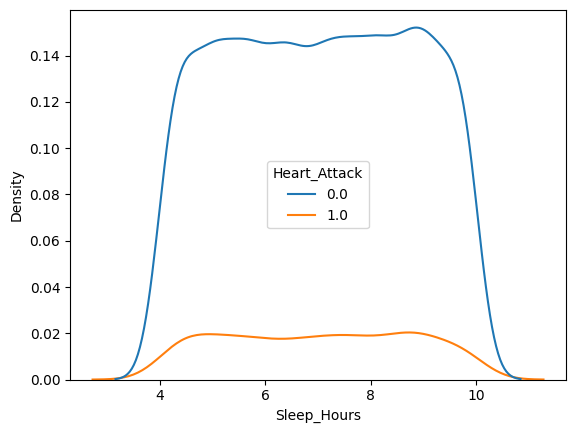

Health_Awareness


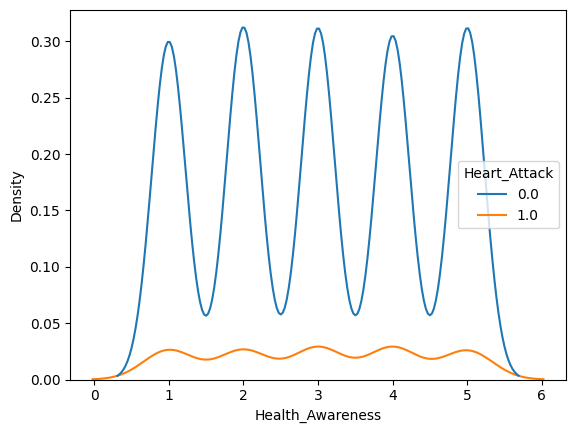

Daily_Water_Intake


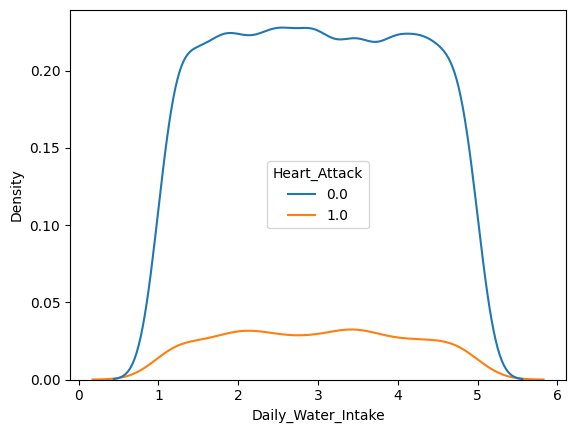

Mental_Health


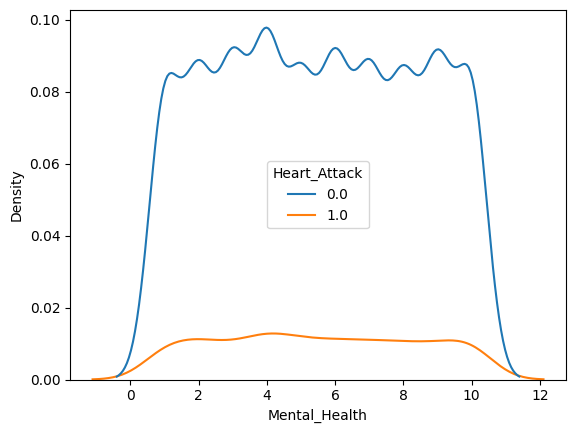

In [30]:
for i in data.select_dtypes(exclude="object"):
    print(i)
    sns.kdeplot(x=data[i],hue=data["Heart_Attack"])
    plt.show()

In [31]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Exercise_Level
['Moderate' 'Low' 'High']
Smoking
[False True]
Alcohol_Consumption
['Moderate' 'Heavy']
Diabetes
[False True]
Family_History
[False True]
Heart_Disease_History
[False True]
Diet
['Unhealthy' 'Healthy' 'Mixed']
Occupation
['Student' 'Unemployed' 'Employed' 'Retired']
Income_Level
['High' 'Low' 'Middle']
Physical_Activity
['Moderate' 'Low' 'High']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Single' 'Married' 'Divorced' 'Widowed']
Urban_Rural
['Urban' 'Rural']
Medication
[False True]
Obesity
[False True]


### **Converting the data into numeric values to make computer to understand the data**

### **Ordinal Data - Ordered Data which have co-relation**
Physical_Activity, Education_Level, Diet, Alcohol_Consumption, Exercise_Level, Income Level

In [32]:
ordrinal_data = ["Physical_Activity","Income_Level","Exercise_Level"]

In [33]:
for i in ordrinal_data:
    xtest[i]=xtest[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    xtrain[i]=xtrain[i].apply(lambda x: 3 if x=="High"  else  1 if x=="Low"  else 2)
    

In [34]:
for i in ordrinal_data:
    print(i,xtrain[i].unique(),xtest[i].unique())

Physical_Activity [2 1 3] [3 2 1]
Income_Level [3 1 2] [3 1 2]
Exercise_Level [2 1 3] [2 3 1]


In [35]:
xtest["Diet"]=xtest["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"]=xtrain["Diet"].apply(lambda x: 3 if x=='Healthy'  else  1 if x=='Unhealthy'  else 2)
xtrain["Diet"].unique(),xtest["Diet"].unique()    

(array([1, 3, 2]), array([1, 3, 2]))

In [36]:
xtest["Alcohol_Consumption"]=xtest["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else  2)
xtrain["Alcohol_Consumption"]=xtrain["Alcohol_Consumption"].apply(lambda x: 3 if x=='Heavy'  else   2)
xtrain["Alcohol_Consumption"].unique(),xtest["Alcohol_Consumption"].unique()    

(array([2, 3]), array([2, 3]))

In [37]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Smoking
[False True]
Diabetes
[False True]
Family_History
[False True]
Heart_Disease_History
[False True]
Occupation
['Student' 'Unemployed' 'Employed' 'Retired']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Single' 'Married' 'Divorced' 'Widowed']
Urban_Rural
['Urban' 'Rural']
Medication
[False True]
Obesity
[False True]


### **Nominal Data - Unordered Data which dont have any corelation**
Urban_Rural, Obesity, Smoking, Diabeties, Family_History

In [38]:
nomial_1= ["Obesity","Smoking","Diabetes","Family_History","Angina","Heart_Disease_History","Medication"]

In [39]:
for i in nomial_1:
    xtrain[i]=xtrain[i].astype(np.int64)
    xtest[i]=xtest[i].astype(np.int64)
    print(i, xtrain[i].unique(),xtest[i].unique())

Obesity [0 1] [0 1]
Smoking [0 1] [0 1]
Diabetes [0 1] [0 1]
Family_History [0 1] [0 1]
Angina [0 1] [0 1]
Heart_Disease_History [0 1] [0 1]
Medication [0 1] [0 1]


In [40]:
Onehot_dummy=[]

In [41]:
for i in xtrain.select_dtypes(include="object"):
    print(i)
    print(xtrain[i].unique())
    Onehot_dummy.append(i)

Gender
['Male' 'Female' 'Other']
Region
['Urban' 'Suburban' 'Rural']
Occupation
['Student' 'Unemployed' 'Employed' 'Retired']
Education_Level
['Primary' 'Higher' 'Secondary']
Marital_Status
['Single' 'Married' 'Divorced' 'Widowed']
Urban_Rural
['Urban' 'Rural']


In [42]:
Onehot_dummy.pop()

'Urban_Rural'

In [43]:
Onehot_dummy

['Gender', 'Region', 'Occupation', 'Education_Level', 'Marital_Status']

In [44]:
for i in Onehot_dummy:
    xtrain = pd.concat([xtrain,pd.get_dummies(xtrain[i]).astype(np.int64)],axis=1)
    xtrain.drop(i,axis=1,inplace=True)
    xtest = pd.concat([xtest,pd.get_dummies(xtest[i]).astype(np.int64)],axis=1)
    xtest.drop(i,axis=1,inplace=True)
    print(xtrain.shape,xtest.shape)

(7985, 30) (1997, 30)
(7985, 32) (1997, 32)
(7985, 35) (1997, 35)
(7985, 37) (1997, 37)
(7985, 40) (1997, 40)


In [45]:
xtrain

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Angina,Heart_Disease_History,Diet,Sleep_Hours,Income_Level,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity,Female,Male,Other,Rural,Suburban,Urban,Employed,Retired,Student,Unemployed,Higher,Primary,Secondary,Divorced,Married,Single,Widowed
25969,43,147.7,212.9,18.9,83.0,2,0,2,0,0,3.0,0,0,1,7.3,3,2,Urban,0,3.0,1.7,2.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
34131,56,108.5,192.0,16.6,98.0,2,0,2,0,1,9.0,0,0,1,9.3,1,2,Urban,0,4.0,5.0,4.0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
28047,26,134.3,213.2,23.0,88.0,2,0,2,0,0,2.0,1,0,1,6.9,1,1,Urban,1,5.0,1.2,6.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
3814,59,108.2,119.2,33.6,64.0,1,0,2,0,0,5.0,0,0,3,4.0,1,2,Urban,0,3.0,1.0,2.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
204,60,130.4,158.4,30.0,89.0,2,1,2,0,1,1.0,1,0,2,7.6,1,1,Rural,0,2.0,2.9,3.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33283,12,106.1,124.5,24.9,92.0,2,1,2,0,0,1.0,0,0,1,7.8,1,2,Urban,0,2.0,3.1,6.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
10295,30,123.4,264.4,26.2,78.0,1,1,2,0,0,7.0,0,0,2,5.0,2,2,Urban,0,1.0,2.3,2.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
7993,55,107.9,132.6,29.7,71.0,2,0,2,0,0,5.0,0,0,3,9.8,1,3,Urban,0,1.0,4.2,6.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
16421,40,96.8,227.3,24.0,74.0,2,1,2,0,0,4.0,0,0,1,6.1,1,2,Urban,1,5.0,1.4,1.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [46]:
xtest["Urban_Rural"]=xtest["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"]=xtrain["Urban_Rural"].apply(lambda x:0  if x=='Rural'  else   1)
xtrain["Urban_Rural"].unique(),xtest["Urban_Rural"].unique()    

(array([1, 0]), array([1, 0]))

In [47]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7985 entries, 25969 to 36433
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    7985 non-null   int64  
 1   Blood_Pressure         7985 non-null   float64
 2   Cholesterol            7985 non-null   float64
 3   BMI                    7985 non-null   float64
 4   Heart_Rate             7985 non-null   float64
 5   Exercise_Level         7985 non-null   int64  
 6   Smoking                7985 non-null   int64  
 7   Alcohol_Consumption    7985 non-null   int64  
 8   Diabetes               7985 non-null   int64  
 9   Family_History         7985 non-null   int64  
 10  Stress_Level           7985 non-null   float64
 11  Angina                 7985 non-null   int64  
 12  Heart_Disease_History  7985 non-null   int64  
 13  Diet                   7985 non-null   int64  
 14  Sleep_Hours            7985 non-null   float64
 15  Inco

In [48]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 27715 to 40966
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1997 non-null   int64  
 1   Blood_Pressure         1997 non-null   float64
 2   Cholesterol            1997 non-null   float64
 3   BMI                    1997 non-null   float64
 4   Heart_Rate             1997 non-null   float64
 5   Exercise_Level         1997 non-null   int64  
 6   Smoking                1997 non-null   int64  
 7   Alcohol_Consumption    1997 non-null   int64  
 8   Diabetes               1997 non-null   int64  
 9   Family_History         1997 non-null   int64  
 10  Stress_Level           1997 non-null   float64
 11  Angina                 1997 non-null   int64  
 12  Heart_Disease_History  1997 non-null   int64  
 13  Diet                   1997 non-null   int64  
 14  Sleep_Hours            1997 non-null   float64
 15  Inco

In [49]:
smote = SMOTE()

In [50]:
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

In [51]:
import statsmodels.api as sm

In [52]:
xtrain_c= sm.add_constant(xtrain)
xtest_c= sm.add_constant(xtest)


In [53]:
lr = sm.Logit(ytrain,xtrain_c).fit(method="bfgs")

         Current function value: 0.245757
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44


C:\Users\MOHIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Heart_Attack   No. Observations:                14138
Model:                          Logit   Df Residuals:                    14097
Method:                           MLE   Df Model:                           40
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.6454
Time:                        16:23:10   Log-Likelihood:                -3474.5
converged:                      False   LL-Null:                       -9799.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.4756      0.532      2.771      0.006       0.432       2.519
Age                       0.0130      0.002      5.940      0.000       0.009       0.017
Blood_Pressure            0.0189      0.002      9.039      0.000       0.015       0.023
Cholesterol               0.0021      0.001      3.419      0.001       0.001       0.003
BMI                       0.0433      0.006      6.766      0.000       0.031       0.056
Heart_Rate                0.0239      0.003      9.044      0.000       0.019       0.029
Exercise_Level           -0.0609      0.045     -1.346      0.178      -0.149       0.028
Smoking                   0.0758      0.070      1.081      0.280      -0.062       0.213
Alcohol_Consumption       1.0345      0.092     11.189      0.000       0.853       1.216
Diabetes                 -0.4215      0.098     -4.295      0.000      -0.614      -0.229
Family_History            0.1691      0.064      2.657      0.008       0.044       0.294
Stress_Level              0.0038      0.011      0.346      0.730      -0.018       0.025
Angina                   -0.5684      0.125     -4.530      0.000      -0.814      -0.323
Heart_Disease_History    -0.9584      0.116     -8.242      0.000      -1.186      -0.730
Diet                      0.1695      0.038      4.452      0.000       0.095       0.244
Sleep_Hours               0.1440      0.018      7.843      0.000       0.108       0.180
Income_Level             -0.0363      0.042     -0.857      0.391      -0.119       0.047
Physical_Activity        -0.0380      0.045     -0.838      0.402      -0.127       0.051
Urban_Rural               0.2423      0.064      3.791      0.000       0.117       0.368
Medication               -0.4801      0.091     -5.250      0.000      -0.659      -0.301
Health_Awareness          0.0876      0.023      3.894      0.000       0.044       0.132
Daily_Water_Intake        0.0741      0.028      2.682      0.007       0.020       0.128
Mental_Health             0.0199      0.011      1.828      0.068      -0.001       0.041
Obesity                  -0.4477      0.088     -5.072      0.000      -0.621      -0.275
Female                   -2.3243      0.179    -12.980      0.000      -2.675      -1.973
Male                     -2.3265      0.179    -12.994      0.000      -2.677      -1.976
Other                    -2.0262      0.233     -8.683      0.000      -2.484      -1.569
Rural                    -3.0244      0.184    -16.404      0.000      -3.386      -2.663
Suburban                 -3.1391      0.190    -16.507      0.000      -3.512      -2.766
Urban                    -2.8819      0.179    -16.078      0.000      -3.233      -2.531
Employed                 -2.4198      0.151    -16.039      0.000      -2.715      -2.124
Retired                  -2.7069      0.185    -14.619      0.000      -3.070      -2.344
Student                  -2.5949      0.164    -15.846      0.000      -2.916      -2.274
U

In [55]:
lr.predict(xtest_c)

27715    0.302394
3197     0.115548
28081    0.022367
6464     0.219437
49426    0.282546
           ...   
13548    0.211279
10313    0.399412
22943    0.168059
13250    0.049086
40966    0.166652
Length: 1997, dtype: float64

In [56]:
lr_test= [1 if i>0.5 else 0 for i in lr.predict(xtest_c) ]

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(ytest,lr_test))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94      1765
         1.0       0.25      0.01      0.02       232

    accuracy                           0.88      1997
   macro avg       0.57      0.50      0.48      1997
weighted avg       0.81      0.88      0.83      1997



In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
s= StandardScaler()

In [62]:
for  i in xtrain.columns:
    xtrain[i]=s.fit_transform(xtrain[[i]])
    xtest[i]=s.transform(xtest[[i]])

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)

In [64]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [65]:
print(classification_report(ytest , knn.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1765
         1.0       0.12      0.12      0.12       232

    accuracy                           0.79      1997
   macro avg       0.50      0.50      0.50      1997
weighted avg       0.80      0.79      0.80      1997



## **KNN Algorithm**

### **Confusion Matrix**

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [67]:
k_n = [i for i in range(3,21,2)]
cross_val=[]
k_n

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [68]:
for i in k_n:
    knn=KNeighborsClassifier(n_neighbors=i)
    cross_val.append(np.mean(cross_val_score(estimator=knn,X=xtrain,y=ytrain,cv=5,scoring="recall",n_jobs=-1)))

In [69]:
np.argmax(cross_val)

np.int64(0)

In [70]:
k_optimal = k_n[np.argmax(cross_val)]

In [71]:
k_optimal

3

In [72]:
knn_model_optimal = KNeighborsClassifier(n_neighbors=k_optimal)

In [73]:
knn_model_optimal.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [74]:
print(classification_report(ytrain,knn_model_optimal.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      7069
         1.0       0.95      0.96      0.96      7069

    accuracy                           0.96     14138
   macro avg       0.96      0.96      0.96     14138
weighted avg       0.96      0.96      0.96     14138



In [75]:
print(classification_report(ytest,knn_model_optimal.predict(xtest
                                                           )))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1765
         1.0       0.14      0.15      0.14       232

    accuracy                           0.79      1997
   macro avg       0.51      0.51      0.51      1997
weighted avg       0.80      0.79      0.80      1997



In [76]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [77]:
dt  = DecisionTreeClassifier(max_depth=3)

In [78]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [79]:
print(classification_report(ytrain,dt.predict(xtrain)))
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81      7069
         1.0       0.89      0.66      0.76      7069

    accuracy                           0.79     14138
   macro avg       0.81      0.79      0.79     14138
weighted avg       0.81      0.79      0.79     14138

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1765
         1.0       0.09      0.06      0.07       232

    accuracy                           0.83      1997
   macro avg       0.49      0.49      0.49      1997
weighted avg       0.79      0.83      0.81      1997



[Text(0.5, 0.875, 'x[35] <= 0.448\ngini = 0.5\nsamples = 14138\nvalue = [7069, 7069]'),
 Text(0.25, 0.625, 'x[33] <= 0.715\ngini = 0.488\nsamples = 9957\nvalue = [4202, 5755]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[34] <= 0.689\ngini = 0.42\nsamples = 7000\nvalue = [2103, 4897]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 3943\nvalue = [0, 3943]'),
 Text(0.1875, 0.125, 'gini = 0.429\nsamples = 3057\nvalue = [2103.0, 954.0]'),
 Text(0.375, 0.375, 'x[37] <= 0.232\ngini = 0.412\nsamples = 2957\nvalue = [2099, 858]'),
 Text(0.3125, 0.125, 'gini = 0.462\nsamples = 1645\nvalue = [1050, 595]'),
 Text(0.4375, 0.125, 'gini = 0.321\nsamples = 1312\nvalue = [1049, 263]'),
 Text(0.75, 0.625, 'x[26] <= 0.727\ngini = 0.431\nsamples = 4181\nvalue = [2867, 1314]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[28] <= 0.233\ngini = 0.47\nsamples = 3160\nvalue = [1968, 1192]'),
 Text(0.5625, 0.125, 'gini = 0.493\nsamples = 1325\nvalue = [586, 739]'),
 Text(0.6875, 0.125, 'gini 

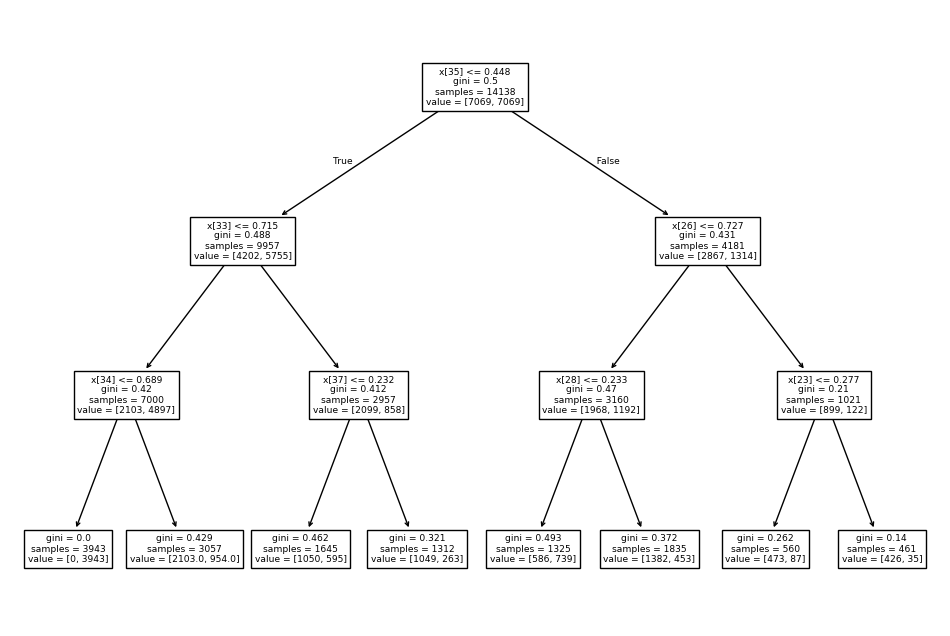

In [80]:
plt.figure(figsize=[12,8])
plot_tree(dt)

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gb_model = GaussianNB()

In [83]:
gb_model.fit(xtrain,ytrain)

GaussianNB()

In [84]:
print(classification_report(ytest, gb_model.predict(xtest))) ### Underfitted

              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81      1765
         1.0       0.12      0.26      0.16       232

    accuracy                           0.69      1997
   macro avg       0.50      0.50      0.49      1997
weighted avg       0.80      0.69      0.73      1997



In [85]:
from sklearn.svm import SVC

In [86]:
svm_model = SVC()

In [87]:
svm_model.fit(xtrain, ytrain)

SVC()

In [88]:
# Printing classification report
def report(model):
    print("Test")
    print(classification_report(ytest,model.predict(xtest)))
    print("Train")
    print(classification_report(ytrain,model.predict(xtrain)))

In [89]:
report(svm_model)

Test
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1765
         1.0       0.00      0.00      0.00       232

    accuracy                           0.88      1997
   macro avg       0.44      0.50      0.47      1997
weighted avg       0.78      0.88      0.83      1997

Train
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7069
         1.0       1.00      0.86      0.93      7069

    accuracy                           0.93     14138
   macro avg       0.94      0.93      0.93     14138
weighted avg       0.94      0.93      0.93     14138



In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param = {'max_depth': [i for i in range(2,6)],
    'min_samples_split': [i for i in range(2,7)]}

In [92]:
param_grid2 = {"C":[0,0.01,0.1],
              "kernel":["rbf","poly","linear","sigmoid"]}

In [93]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=param,n_jobs=-1,cv=5)

In [94]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [95]:
grid2 = GridSearchCV(estimator=SVC(),
                     param_grid=param_grid2,scoring="recall",
                     cv = 5,
                     n_jobs=-1)

In [96]:
grid2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='recall')

In [97]:
grid2.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [98]:
svc_model = SVC(C=0.01,kernel="linear")

In [99]:
svc_model.fit(xtrain,ytrain)

SVC(C=0.01, kernel='linear')

In [100]:
report(svc_model)

Test
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1765
         1.0       0.00      0.00      0.00       232

    accuracy                           0.88      1997
   macro avg       0.44      0.50      0.47      1997
weighted avg       0.78      0.88      0.83      1997

Train
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7069
         1.0       1.00      0.86      0.93      7069

    accuracy                           0.93     14138
   macro avg       0.94      0.93      0.93     14138
weighted avg       0.94      0.93      0.93     14138

